Prediction about Boston dwelling prices

# data 

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
boston = load_boston()

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
Y = boston.target

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 20)

# sklearn

In [6]:
linear = linear_model.LinearRegression() #build an OLS linear model
linear.fit(x_train,y_train) #use training set to train the model

def sklear_result(model):
    print("R square:\n",model.score(x_train,y_train)) #reture R square of trained model
    print("adjusted R-squared:\n",(1 - (1-model.score(x_train,y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)))
    print("weight of each predictor:\n",model.coef_) #obtain weight of each predictor
    print("intercept:\n",model.intercept_)
    
sklear_result(linear)

R square:
 0.7476893972682184
adjusted R-squared:
 0.7380422271637679
weight of each predictor:
 [-6.19301929e-02  2.81186445e-02  3.66814472e-02  2.10397452e+00
 -2.03350967e+01  4.59835801e+00  9.51793259e-03 -1.25565037e+00
  2.27666033e-01 -1.02461357e-02 -8.55652331e-01  9.36245698e-03
 -4.55758806e-01]
intercept:
 28.687850966055255


In [114]:
linear.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [30]:
y_pred = linear.predict(x_test)
mse = np.mean((y_pred-y_test)**2)
mse

25.393200158591675

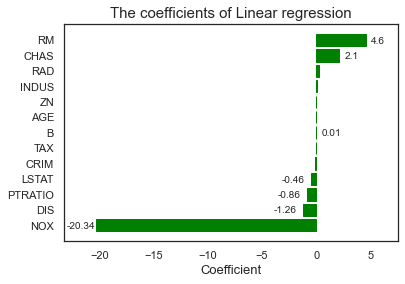

In [242]:
def plot_barh_coef(feature_name,model):
    #only sklearn can use model.coef_
    sorted_df = pd.DataFrame(zip(feature_name,model.coef_)).rename(columns={0:"feature_names",1:"coef"}).sort_values(by="coef",ascending = True)
    plt.barh(range(len(feature_name)), sorted_df.coef, color="green", edgecolor='green')
    plt.xlim([sorted_df.coef.min()-3,sorted_df.coef.max()+3])
    plt.yticks(range(len(feature_name)), sorted_df.feature_names)
    plt.title("The coefficients of Linear regression", fontsize=15)
    plt.xlabel("Coefficient", fontsize=13)
    
    for i in range(len(sorted_df)): #annotate numbers
        name = sorted_df.iloc[i,0]
        row_ind = sorted_df[sorted_df.feature_names == name].index
        pvalue = float(lm.pvalues[row_ind])
        label = float(round((sorted_df.loc[row_ind,"coef"]),2))
        if pvalue < 0.05:
            if label >= 0:
                plt.annotate(label, # this is the text
                             (label+0.5,i-0.7), # these are the coordinates to position the label. Dataset-depended.
                             textcoords="offset points", # how to position the text
                             xytext=(0,10), # distance from text to points (x,y)
                             ha='left',
                             va='center') # horizontal alignment can be left, right or center
            else:
                plt.annotate(label, 
                             (label-2.7,i-0.7), 
                             textcoords="offset points",
                             xytext=(0,10), 
                             ha='left',
                             va='center')

plot_barh_coef(boston.feature_names,linear)

We can see that RM is the main factor that positively affects house price. When the RM increases by 1 unit, the price will increase by 4.6%. And NOX is the main factor that negatively affects the house price. When NOX increases by 1 unit, the price will decrease by 20.34%.

# statsmodels.formula.api 

In [116]:
import statsmodels.formula.api as smf
boston = load_boston()
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data['medv'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='LSTAT', ylabel='medv'>

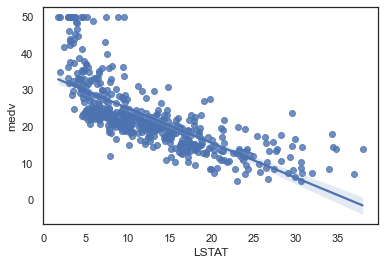

In [118]:
sns.regplot('LSTAT', 'medv', data=data)

In [125]:
string_cols = ' + '.join(data.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.72e-135
Time:                        23:05:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [98]:
# remove age
string_cols = ' + '.join(data.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.72e-135
Time:                        22:38:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
B              0.0093      0.003      3.467      0.001       0.004       0.015
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
RM             3.8099      0.418      9.116      0.000       2.989       4.631
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

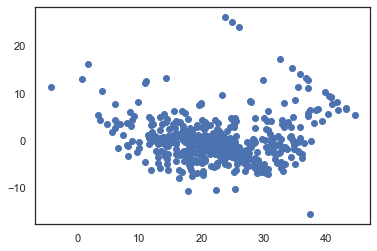

In [99]:
#residual plot

plt.scatter(results.fittedvalues, results.resid);

In [ ]:
print(results.rsquared_adj)

In [97]:
from statsmodels.stats.anova import anova_lm

results1 = smf.ols('medv ~ LSTAT', data=data).fit()
results2 = smf.ols('medv ~ LSTAT + np.power(LSTAT, 2)', data=data).fit()

anova_lm(results1, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


# statsmodels.api

In [169]:
import statsmodels.api as sm

lm = sm.OLS(y_train, x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              667.6
Date:                Tue, 10 May 2022   Prob (F-statistic):                   1.74e-233
Time:                        23:38:57   Log-Likelihood:                         -1054.4
No. Observations:                 354   AIC:                                      2135.
Df Residuals:                     341   BIC:                                      2185.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [137]:
y_pred = lm.predict(x_test)
mse = np.mean((y_pred-y_test)**2)
mse

29.435947618963077

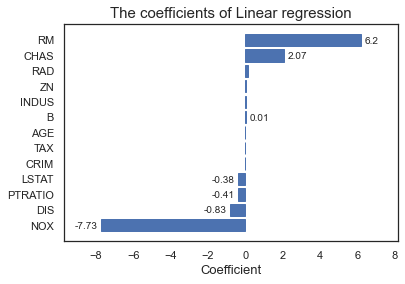

In [237]:
def plot_barh_coef(feature_name,model):
    sorted_df = pd.DataFrame(model.params).reset_index().rename(columns={'index':"feature_names",0:"coef"}).sort_values(by="coef",ascending = True)
    plt.barh(range(len(feature_name)), sorted_df.coef, color="b", edgecolor='b')
    plt.xlim([sorted_df.coef.min()-2,sorted_df.coef.max()+2])
    plt.yticks(range(len(feature_name)), sorted_df.feature_names)
    plt.title("The coefficients of Linear regression", fontsize=15)
    plt.xlabel("Coefficient", fontsize=13)
    
    for i in range(len(sorted_df)): #annotate numbers
        name = sorted_df.iloc[i,0]
        row_ind = sorted_df[sorted_df.feature_names == name].index
        pvalue = float(lm.pvalues[row_ind])
        label = float(round((sorted_df.loc[row_ind,"coef"]),2))
        if pvalue < 0.05:
            if label >= 0:
                plt.annotate(label, # this is the text
                             (label+0.2,i-0.7), # these are the coordinates to position the label. Dataset-depended.
                             textcoords="offset points", # how to position the text
                             xytext=(0,10), # distance from text to points (x,y)
                             ha='left',
                             va='center') # horizontal alignment can be left, right or center
            else:
                plt.annotate(label, 
                             (label-1.4,i-0.7), 
                             textcoords="offset points",
                             xytext=(0,10), 
                             ha='left',
                             va='center')

plot_barh_coef(boston.feature_names,lm)